In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amirebrahiminasab","key":"f5ea3a6c93484c7a343c4382559fb1c5"}'}

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d behdadkarimi/persian-tweets-emotional-dataset

Dataset URL: https://www.kaggle.com/datasets/behdadkarimi/persian-tweets-emotional-dataset
License(s): copyright-authors
100% 11.6M/11.6M [00:01<00:00, 13.4MB/s]
100% 11.6M/11.6M [00:01<00:00, 7.03MB/s]


In [5]:
!unzip persian-tweets-emotional-dataset

Archive:  persian-tweets-emotional-dataset.zip
  inflating: anger.csv               
  inflating: disgust.csv             
  inflating: fear.csv                
  inflating: joy.csv                 
  inflating: sad.csv                 
  inflating: surprise.csv            


In [6]:
import pandas as pd

In [7]:
anger = pd.read_csv("anger.csv")
disgust = pd.read_csv("disgust.csv")
fear = pd.read_csv("fear.csv")
joy = pd.read_csv("joy.csv")
sad = pd.read_csv("sad.csv")
surprise = pd.read_csv("surprise.csv")

anger

,tweet,replyCount,retweetCount,likeCount,quoteCount,hashtags,sourceLabel,emotion
0,دیشب خواب دیدم بمبی چیزی زدن نورش خیلی خیره کن...,0,3,2,0,['No2IR'],Twitter Web App,anger
1,تبر زدی بر ریشه‌اَم، جوانه رویید جایِ زخم\nران...,0,0,8,0,['سين_کاف'],Twitter for Android,anger
2,پدر سوخته ای که بابام بهم میگه دو معنی داره که...,1,0,11,0,['پدر_ایرانی'],Twitter for Android,anger
3,با خود مواجه شوید و اخم نکنید. اقتدار در نگاه ...,0,0,1,0,"['جذبه', 'اخم']",Twitter for iPhone,anger
4,مدح تو را در شادی و در غم نوشتند\nبا این همه ا...,4,6,36,0,['نبأ_عظیم'],Twitter Web App,anger
...,...,...,...,...,...,...,...,...
20064,پرخاشگری پلیس #افغانستان؛ نیروی غیرحرفه‌ای یا ...,0,1,5,0,['افغانستان'],Twitter for iPhone,anger
20065,فروید می‌گوید: «تمدن از آنجا آغاز شد که انسان ...,0,3,23,0,['کلمات'],Twitter for Android,anger
20066,#رشتو\n۱) صبح امروز(۰۰/۰۱/۱۵) راننده خطی ایستگ...,3,0,3,0,['رشتو'],Twitter for Android,anger
20067,وقتی میگیم #پالانفارسیسم ملقمه بیشعوری فروما...,2,0,3,0,"['پالانفارسیسم', 'مجوس']",Twitter Web App,anger


In [8]:
emotions = {"anger": list(anger['tweet']), "disgust": list(disgust["tweet"]),
          "fear": list(fear["tweet"]), "joy": list(joy["tweet"]), "sad": list(sad["tweet"]), "surprise": list(surprise["tweet"])}

In [9]:
decode_label = {'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'sad': 4, 'surprise': 5}

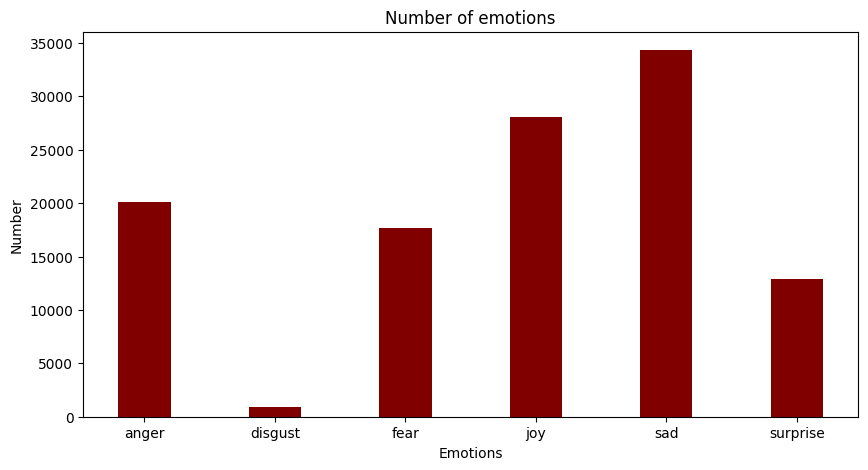

In [10]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (10, 5))

plt.bar(list(emotions.keys()), [len(emotions[emot]) for emot in list(emotions.keys())], color ='maroon', width = 0.4)

plt.xlabel("Emotions")
plt.ylabel("Number")
plt.title("Number of emotions")
plt.show()

In [11]:
import re

def clean_captions(text):
  url_pattern = re.compile(r'http\S+|www\S+')
  text = url_pattern.sub(r'', text)
  text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
  text = re.sub(r'\d+', '', text)      # Remove numbers
  text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
  return text.strip()

In [12]:
emotions['anger'][3]

'با خود مواجه شوید و اخم نکنید. اقتدار در نگاه ات است نه در چشمانت. بگذار خود واقعیت جذبه را نقش دهد.\n( عکس ها کپی شده) #جذبه #اخم https://t.co/YDsiQU8JqG'

In [13]:
clean_captions(emotions['anger'][3])

'با خود مواجه شوید و اخم نکنید اقتدار در نگاه ات است نه در چشمانت بگذار خود واقعیت جذبه را نقش دهد عکس ها کپی شده جذبه اخم'

In [14]:
for emotion in list(emotions.keys()):
  emotions[emotion] = [clean_captions(tweet) for tweet in emotions[emotion]]

emotions['anger'][3]

'با خود مواجه شوید و اخم نکنید اقتدار در نگاه ات است نه در چشمانت بگذار خود واقعیت جذبه را نقش دهد عکس ها کپی شده جذبه اخم'

In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [16]:
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

In [17]:
max_len = 0
for emotion in list(emotions.keys()):
  max_len = max(max(len(s) for s in emotions[emotion]), max_len)


In [18]:
max_len

279

In [19]:
for emotion in list(emotions.keys()):
  emotions[emotion] = tokenizer(emotions[emotion], return_tensors="pt", padding=True, max_length=max_len+1)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2778: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


In [20]:
emotions['anger'][3]

Encoding(num_tokens=96, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [21]:
for emotion, tokenized_data in emotions.items():
    print(f"Emotion: {emotion}")
    print(tokenized_data)
    break

Emotion: anger
{'input_ids': tensor([[    2, 13274,  4348,  ...,     0,     0,     0],
        [    2, 14660, 32698,  ...,     0,     0,     0],
        [    2,  3690, 13939,  ...,     0,     0,     0],
        ...,
        [    2,  5385,  1154,  ...,     0,     0,     0],
        [    2,  3043, 64848,  ...,     0,     0,     0],
        [    2,  2375,  2036,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [22]:
whole_dataset = []

for emotion, tokenized_data in emotions.items():
  for i in range(len(tokenized_data['input_ids'])):
    whole_dataset.append((tokenized_data['input_ids'][i], tokenized_data['attention_mask'][i], torch.tensor([decode_label[emotion]])))

len(whole_dataset)

113829

In [23]:
import random

random.shuffle(whole_dataset)
sz = int(len(whole_dataset) * 0.8)
train_data, test_data = whole_dataset[:sz], whole_dataset[sz:]

In [24]:
import torch.optim as optim

model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-base-parsbert-uncased", num_labels = 6)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.train()

pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [25]:
optimizer = optim.Adam(model.parameters(), lr=1e-5)


# for epoch in range(2):
for input_ids, attention_mask, label in train_data:
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    label = label.to(device)
    optimizer.zero_grad()
    outputs = model(input_ids=input_ids.unsqueeze(0), attention_mask=attention_mask.unsqueeze(0), labels=label)

    loss = outputs.loss
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Streaming output truncated to the last 5000 lines.
Epoch 1, Loss: 0.010369944386184216
Epoch 1, Loss: 0.014740251004695892
Epoch 1, Loss: 0.009718249551951885
Epoch 1, Loss: 0.0068053374998271465
Epoch 1, Loss: 0.010702237486839294
Epoch 1, Loss: 0.008833142928779125
Epoch 1, Loss: 0.004648237023502588
Epoch 1, Loss: 0.006512963213026524
Epoch 1, Loss: 0.013994069769978523
Epoch 1, Loss: 0.052384454756975174
Epoch 1, Loss: 0.01065836288034916
Epoch 1, Loss: 0.009178586304187775
Epoch 1, Loss: 0.020969010889530182
Epoch 1, Loss: 0.0277195256203413
Epoch 1, Loss: 0.007479639258235693
Epoch 1, Loss: 0.009642808698117733
Epoch 1, Loss: 0.005610552150756121
Epoch 1, Loss: 0.024778997525572777
Epoch 1, Loss: 0.012782190926373005
Epoch 1, Loss: 0.01802867464721203
Epoch 1, Loss: 0.010663080960512161
Epoch 1, Loss: 0.008948225528001785
Epoch 1, Loss: 0.012572318315505981
Epoch 1, Loss: 0.011720015667378902
Epoch 1, Loss: 0.015186987817287445
Epoch 1, Loss: 3.2177793979644775
Epoch 1, Loss: 0.5

KeyboardInterrupt: 

In [46]:
model.eval()
correct_label, total_label = 0, 0

with torch.no_grad():
  for input_ids, attention_mask, label in test_data:
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        label = label.to(device)
        output = model(input_ids=input_ids.unsqueeze(0), attention_mask=attention_mask.unsqueeze(0))
        if (output['logits'].argmax(1) == label).item():
          correct_label += 1
        total_label += 1
        print(f"Current Accuracy is: {100 * correct_label / total_label}%")


print(f"Test Accuracy is: {100 * correct_label / total_label}%")


Streaming output truncated to the last 5000 lines.
Current Accuracy is: 93.37573165240883%
Current Accuracy is: 93.37610445157297%
Current Accuracy is: 93.37647720877884%
Current Accuracy is: 93.37684992403354%
Current Accuracy is: 93.37722259734414%
Current Accuracy is: 93.37759522871772%
Current Accuracy is: 93.37796781816137%
Current Accuracy is: 93.37834036568213%
Current Accuracy is: 93.37871287128714%
Current Accuracy is: 93.3790853349834%
Current Accuracy is: 93.37945775677804%
Current Accuracy is: 93.37983013667811%
Current Accuracy is: 93.38020247469066%
Current Accuracy is: 93.38057477082279%
Current Accuracy is: 93.38094702508154%
Current Accuracy is: 93.38131923747399%
Current Accuracy is: 93.3816914080072%
Current Accuracy is: 93.3764408209165%
Current Accuracy is: 93.37681322388396%
Current Accuracy is: 93.37156350143363%
Current Accuracy is: 93.36631436923768%
Current Accuracy is: 93.36668727865535%
Current Accuracy is: 93.36706014614953%
Current Accuracy is: 93.36743297